In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [295]:
def calculate_depth(h):
    depth = np.zeros(len(h))
    depth[0] = h[0]
    for i in range(1,len(h)):
        depth[i] = h[i] + depth[i-1]
#     print(depth)
    return depth

def calculate_RC(AI,depth,vres=1):
    RC = [(AI[i+1]-AI[i]) / (AI[i+1]+AI[i]) for i in range(len(AI)-1)]
    depth_rc = np.arange(0,max(depth)+vres,vres)
    RC_fix = np.zeros(len(depth_rc))

    i = 0
    for j in range(len(depth_rc)-1):
        if depth_rc[j] == depth[i+1]:
            RC_fix[j] = RC[i]
            i = i+1

    # print(RC_fix)
    return RC_fix, depth_rc

vp = [2000,1800,2100,2000,2200,2000,2400,2400]
h = [0,50,20,10,50,10,60,100]
depth = calculate_depth(h)
rho = [2500,2200,2400,2500,2500,2500,2800,2800]
AI = [vp[i] * rho[i] for i in range(len(vp))]
RC, depth_rc = calculate_RC(AI, depth)


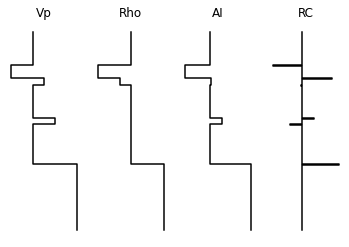

In [296]:
fig, ax = plt.subplots(1,4)

ax[0].step(vp, depth,color='black')
ax[1].step(rho, depth,color='black')
ax[2].step(AI, depth,color='black')
ax[3].step(RC, depth_rc,color='black')

ax[0].set_title('Vp')
ax[1].set_title('Rho')
ax[2].set_title('AI')
ax[3].set_title('RC')


for axis in ax:
    axis.invert_yaxis()
    axis.axis('off')

plt.show()

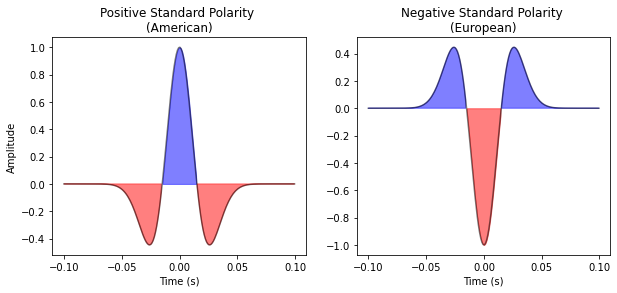

In [297]:
def ricker(f, length, dt):
    t = np.linspace(-length/2, (length-dt)/2, int(length/dt))
    y = (1.-2.*(np.pi**2)*(f**2)*(t**2))*np.exp(-(np.pi**2)*(f**2)*(t**2))
    return t, y

dt = 0.001 # sampling rate in second
freq = 50  # Hz

t, y = ricker(f, length=0.2, dt=dt)

fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(t, y,'black',alpha=0.5)
ax[0].fill_between(t, y, 0, y>=0.0, interpolate=False, color='blue', alpha=0.5)
ax[0].fill_between(t, y, 0, y<0.0, interpolate=False, color='red', alpha=0.5)

ax[1].plot(t, -y,'black',alpha=0.5)
ax[1].fill_between(t, -y, 0, y>=0.0, interpolate=False, color='red', alpha=0.5)
ax[1].fill_between(t, -y, 0, y<0.0, interpolate=False, color='blue', alpha=0.5)

ax[0].set_title('Positive Standard Polarity \n(American)')
ax[0].set_ylabel('Amplitude')
ax[0].set_xlabel('Time (s)')
ax[1].set_title('Negative Standard Polarity \n(European)')
ax[1].set_xlabel('Time (s)')
plt.show()

In [298]:
syn = np.convolve(RC,y,mode='same')

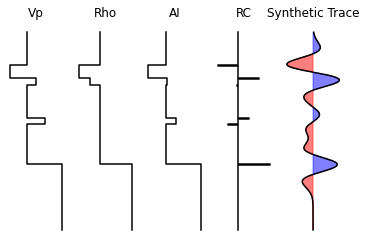

In [299]:
vp = [2000,1800,2100,2000,2200,2000,2400,2400]
h = [0,50,20,10,50,10,60,100]
depth = calculate_depth(h)
rho = [2500,2300,2400,2500,2500,2500,2800,2800]
AI = [vp[i] * rho[i] for i in range(len(vp))]
RC, depth_rc = calculate_RC(AI, depth)

fig, ax = plt.subplots(1,5)

ax[0].step(vp, depth,color='black')
ax[1].step(rho, depth,color='black')
ax[2].step(AI, depth,color='black')
ax[3].step(RC, depth_rc,color='black')
ax[4].plot(syn, depth_rc,color='black')

ax[0].set_title('Vp')
ax[1].set_title('Rho')
ax[2].set_title('AI')
ax[3].set_title('RC')
ax[4].set_title('Synthetic Trace')
ax[4].fill_betweenx(depth_rc, 0, syn, syn>0, interpolate=False, color='blue', alpha=0.5)
ax[4].fill_betweenx(depth_rc, 0, syn, syn<0.0, interpolate=False, color='red', alpha=0.5)

for axis in ax:
    axis.invert_yaxis()
    axis.axis('off')

plt.show()

In [300]:
traces = []
for i in range(len(RC)):
    if RC[i] != 0:
        a = np.zeros(len(RC))
        a[i] = RC[i]
        conv = np.convolve(a,y,mode='same')
        traces.append(conv)


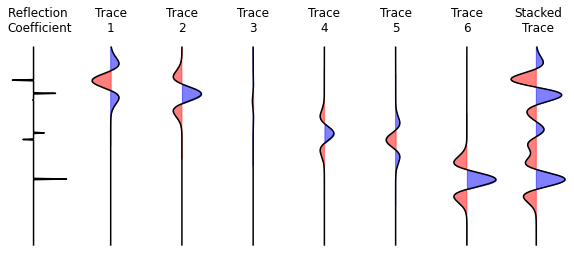

In [301]:
fig, ax = plt.subplots(1,8, figsize=(10,4))

ax[0].plot(RC, depth_rc,color='black')
ax[0].set_title(f'Reflection \nCoefficient')
for i in range(6):
    ax[i+1].plot(traces[i], depth_rc,color='black')
    ax[i+1].fill_betweenx(depth_rc, 0, traces[i], traces[i]>0, interpolate=False, color='blue', alpha=0.5)
    ax[i+1].fill_betweenx(depth_rc, 0, traces[i], traces[i]<0.0, interpolate=False, color='red', alpha=0.5)
    ax[i+1].set_xlim(-1.5e-1,1.5e-1)
    ax[i+1].set_title(f'Trace\n{i+1}')

trace = sum(traces)
ax[7].plot(trace, depth_rc,color='black')
ax[7].fill_betweenx(depth_rc, 0, trace, trace>0, interpolate=False, color='blue', alpha=0.5)
ax[7].fill_betweenx(depth_rc, 0, trace, trace<0.0, interpolate=False, color='red', alpha=0.5)
ax[7].set_title(f'Stacked\nTrace')

for axis in ax:
    
    axis.invert_yaxis()
    axis.axis('off')

In [282]:
trace = sum(traces)